In [1]:
# Recorre todo el laberinto

In [35]:
import copy
import numpy as np
import random
import matplotlib.pyplot as plt
from collections import deque

In [56]:
np.random.seed(42)
random.seed(42)

def generar_laberinto_conectado(filas, columnas):
    # Asegurar que filas y columnas sean impares para el algoritmo
    if filas % 2 == 0:
        filas += 1
    if columnas % 2 == 0:
        columnas += 1
        
    # Inicializar laberinto con todas las paredes
    laberinto = [['1' for _ in range(columnas)] for _ in range(filas)]
    visitado = [[False for _ in range(columnas)] for _ in range(filas)]
    
    def vecinos(x, y):
        dirs = [(-2,0),(2,0),(0,-2),(0,2)]
        result = []
        for dx, dy in dirs:
            nx, ny = x+dx, y+dy
            if 0 <= nx < filas and 0 <= ny < columnas and not visitado[nx][ny]:
                result.append((nx, ny))
        random.shuffle(result)
        return result
    
    def dfs(x, y):
        visitado[x][y] = True
        laberinto[x][y] = '0'
        
        for nx, ny in vecinos(x, y):
            if not visitado[nx][ny]:
                # Elimina la pared entre celdas
                laberinto[(x+nx)//2][(y+ny)//2] = '0'
                dfs(nx, ny)
    
    # Comenzar desde una posición impar (esquina superior izquierda válida)
    start_x, start_y = 1, 1
    if start_x < filas and start_y < columnas:
        dfs(start_x, start_y)
    
    # Crear algunas aberturas adicionales para hacer el laberinto más interesante
    # y asegurar que no queden áreas completamente aisladas
    for i in range(3, filas-1, 4):
        for j in range(3, columnas-1, 4):
            if random.random() < 0.3:  # 30% probabilidad de crear apertura
                if i > 0 and laberinto[i-1][j] == '1':
                    laberinto[i-1][j] = '0'
                elif j > 0 and laberinto[i][j-1] == '1':
                    laberinto[i][j-1] = '0'
    
    return laberinto

laberinto_conectado = generar_laberinto_conectado(20, 20)

for fila in laberinto_conectado:
    print(''.join(fila))


111111111111111111111
100000100010000010001
111010101010111010101
100000001000100000101
101111101111101111101
100000101000000000001
111110101110101111111
100000100000100010001
101111111010111011101
100000001010001000101
111011101110101110101
100000001000001010101
101010101011111010101
101010100010000010101
111010101110111010101
100010100000100010001
101110101011101111101
101000101010000010001
101111101010111110111
100000001000000000001
111111111111111111111


# Convertir el laberinto a un array NumPy para visualizarlo

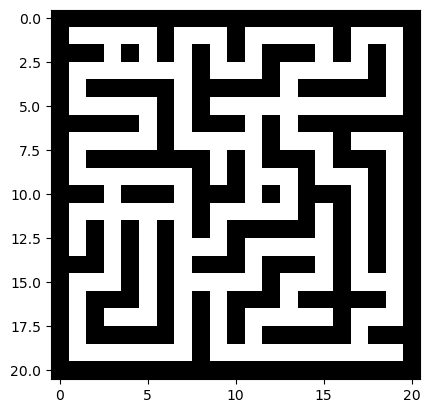

In [57]:
plt.imshow(np.array([[int(c) for c in fila] for fila in laberinto_conectado]), cmap='binary')

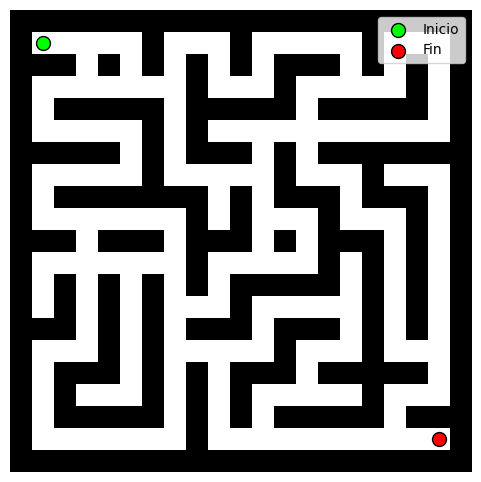

In [58]:
lab_np = np.array([[int(c) for c in fila] for fila in laberinto_conectado])
plt.figure(figsize=(6, 6))
plt.imshow(lab_np, cmap='binary')

# Punto de inicio (verde)
inicio = (1, 1)
plt.scatter(inicio[1], inicio[0], c='lime', s=100, label='Inicio', edgecolors='black')

# Punto de fin (rojo)
fin = (len(lab_np)-2, len(lab_np[0])-2)
plt.scatter(fin[1], fin[0], c='red', s=100, label='Fin', edgecolors='black')

plt.legend(loc='upper right')
plt.axis('off')
plt.show()

# Muestra parcialmente la ruta tomada.

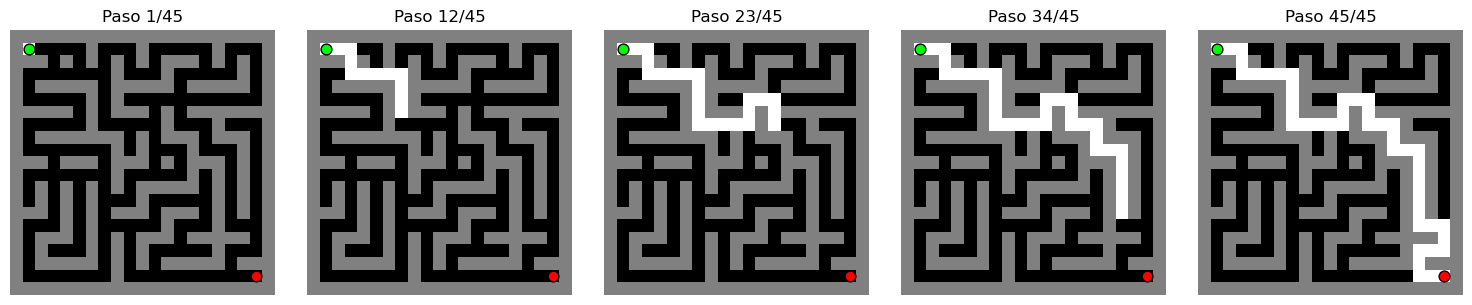

In [59]:
# Algoritmo BFS para encontrar la ruta más corta en el laberinto
def bfs(lab, inicio, fin):
    filas, columnas = len(lab), len(lab[0])
    visitado = [[False]*columnas for _ in range(filas)]
    prev = [[None]*columnas for _ in range(filas)]
    queue = deque([inicio])
    visitado[inicio[0]][inicio[1]] = True

    while queue:
        x, y = queue.popleft()
        if (x, y) == fin:
            break
        for dx, dy in [(-1,0),(1,0),(0,-1),(0,1)]:
            nx, ny = x+dx, y+dy
            if 0 <= nx < filas and 0 <= ny < columnas and not visitado[nx][ny] and int(lab[nx][ny]) == 0:
                queue.append((nx, ny))
                visitado[nx][ny] = True
                prev[nx][ny] = (x, y)

    # Reconstruir la ruta
    ruta = []
    at = fin
    while at and at != inicio:
        ruta.append(at)
        at = prev[at[0]][at[1]]
    if at == inicio:
        ruta.append(inicio)
        ruta.reverse()
        return ruta
    return []

# Usar el laberinto generado y las variables inicio y fin
ruta_mas_corta = bfs(laberinto_conectado, inicio, fin)

# Visualizar el progreso en 5 imágenes
lab_array = np.array([[int(c) for c in fila] for fila in laberinto_conectado])
num_imgs = 5
pasos = np.linspace(1, len(ruta_mas_corta), num_imgs, dtype=int)

fig, axs = plt.subplots(1, num_imgs, figsize=(15, 3))
for idx, paso in enumerate(pasos):
    lab_temp = lab_array.copy()
    for x, y in ruta_mas_corta[:paso]:
        lab_temp[x, y] = 2  # Marcar la ruta con un valor diferente
    axs[idx].imshow(lab_temp, cmap='gray')
    axs[idx].scatter(inicio[1], inicio[0], c='lime', s=60, edgecolors='black', label='Inicio')
    axs[idx].scatter(fin[1], fin[0], c='red', s=60, edgecolors='black', label='Fin')
    axs[idx].set_title(f'Paso {paso}/{len(ruta_mas_corta)}')
    axs[idx].axis('off')
plt.tight_layout()
plt.show()

Este programa genera un laberinto aleatorio y encuentra la ruta más corta desde un punto de inicio hasta un punto final utilizando el algoritmo de búsqueda en anchura (BFS). El laberinto se visualiza paso a paso, mostrando el progreso de la ruta encontrada.

**Funcionamiento general:**
1. Se genera un laberinto conectado de tamaño configurable.
2. Se define un punto de inicio (`inicio`) y un punto de fin (`fin`).
3. Se utiliza BFS para hallar la ruta más corta entre ambos puntos.
4. Se visualiza el laberinto y el avance de la ruta en varias imágenes.

**Variables que se pueden cambiar:**
- `filas` y `columnas`: Definen el tamaño del laberinto.
- `semilla`: Permite fijar la aleatoriedad para reproducir el mismo laberinto.
- `inicio` y `fin`: Coordenadas de inicio y fin de la ruta.
- `num_imgs`: Número de imágenes intermedias para mostrar el progreso de la ruta.

Puedes modificar estas variables para experimentar con diferentes laberintos, rutas y visualizaciones.